## 10.3 使用预训练的语义分割网络


**Daitu：2505131775@qq.com**

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
## 导入本章所需要的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import torch
from torchvision import transforms

In [4]:
import torchvision

model = torchvision.models.segmentation.fcn_resnet101(pretrained=True)
model.eval()


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
      

In [5]:
## 读取照片
image = PIL.Image.open("data/chap10/照片1.jpg")
## 照片预处理，转化到0-1之间，标准化处理
image_transf = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                         std = [0.229, 0.224, 0.225])
])
image_tensor = image_transf(image).unsqueeze(0)
output = model(image_tensor)["out"]

In [6]:
## 读取图片，然后进行分割
output.shape
## 模型在21个数据类上进行训练，所以输出有21个通道

torch.Size([1, 21, 720, 960])

In [7]:
## 将输出转化为2维图像
outputarg = torch.argmax(output.squeeze(), dim=0).numpy()
outputarg

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ..., 
       [15, 15, 15, ...,  0,  0,  0],
       [15, 15, 15, ...,  0,  0,  0],
       [15, 15, 15, ...,  0,  0,  0]])

In [8]:
## 对得到的输出结果进行编码
def decode_segmaps(image,label_colors, nc=21):
    """函数将输出的2D图像会将不同的类编码为不同的颜色"""
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    for cla in range(0, nc):
        idx = image == cla
        r[idx] = label_colors[cla, 0]
        g[idx] = label_colors[cla, 1]
        b[idx] = label_colors[cla, 2]
    rgbimage = np.stack([r, g, b], axis=2)
    return rgbimage

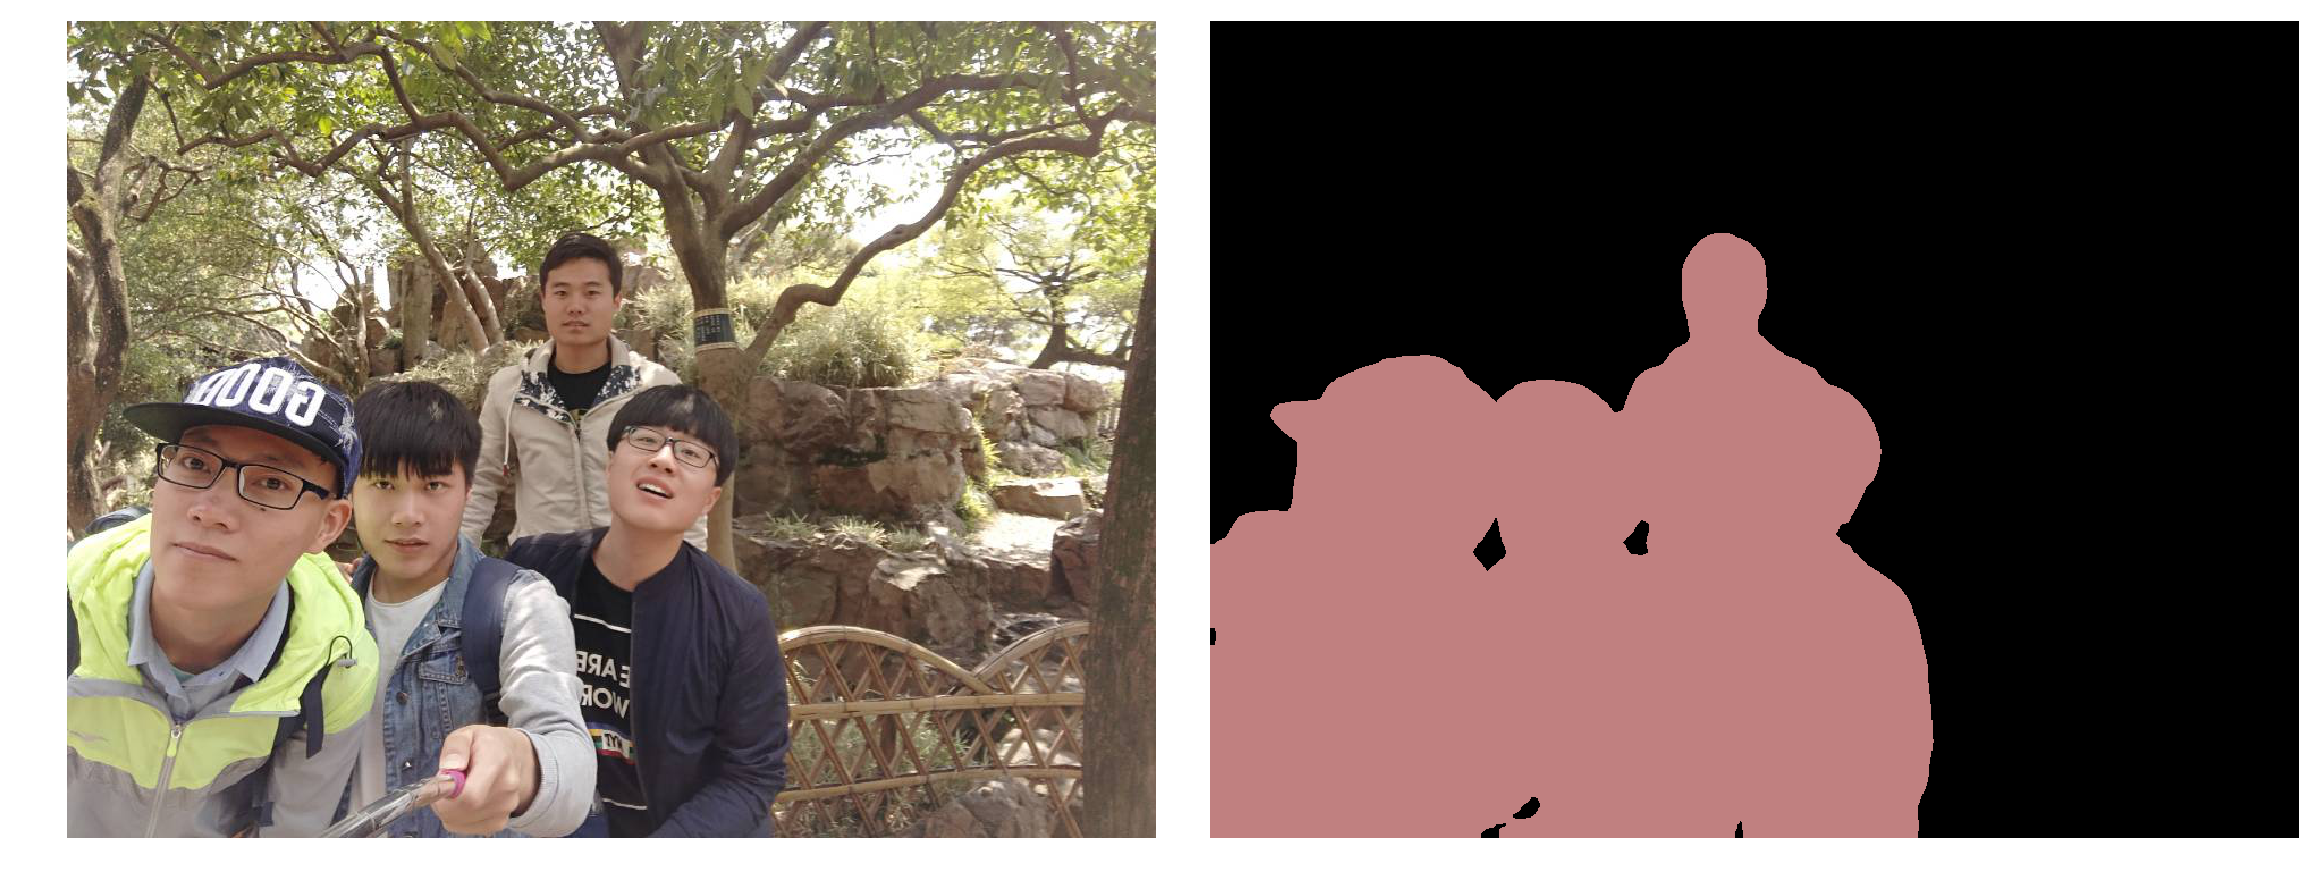

In [10]:
label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

outputrgb = decode_segmaps(outputarg,label_colors)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(outputrgb)
plt.axis("off")
plt.subplots_adjust(wspace=0.05)
plt.show()

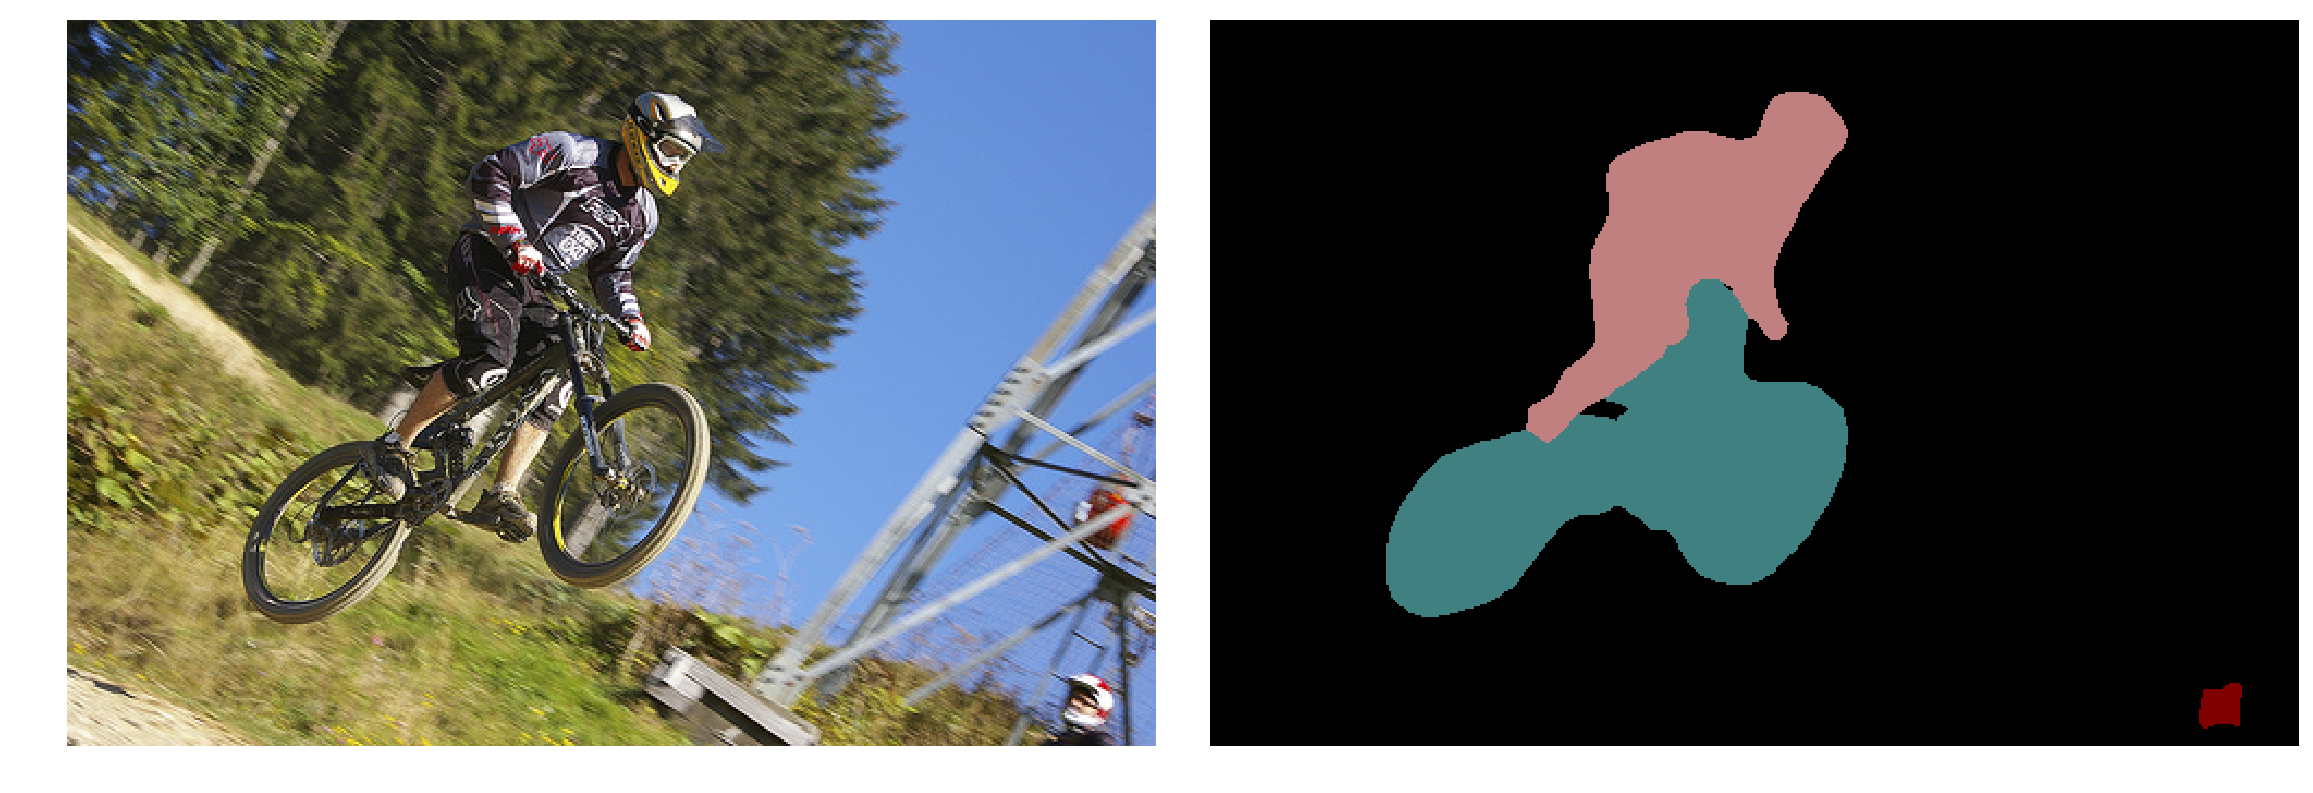

In [11]:
## 读取照片
image = PIL.Image.open("data/chap10/2012_004308.jpg")
image_tensor = image_transf(image).unsqueeze(0)
output = model(image_tensor)["out"]
## 将输出转化为2维图像
outputarg = torch.argmax(output.squeeze(), dim=0).numpy()
outputrgb = decode_segmaps(outputarg,label_colors)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(outputrgb)
plt.axis("off")
plt.subplots_adjust(wspace=0.05)
plt.show()